In [1]:
import pandas as pd

from sklearn.cluster import MeanShift

In [2]:
df_candy = pd.read_csv('../data/candy.csv')

In [3]:
df_candy.head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [9]:
X = df_candy.drop('competitorname', axis = 1)

meanshift = MeanShift().fit(X)
print(max(meanshift.labels_))

2


In [10]:
print(meanshift.cluster_centers_)

[[2.25000000e-01 5.75000000e-01 1.00000000e-01 2.50000000e-02
  5.00000000e-02 2.50000000e-02 3.00000000e-01 1.00000000e-01
  5.50000000e-01 4.57599993e-01 3.67824996e-01 4.10442122e+01]
 [4.68750000e-01 5.00000000e-01 1.25000000e-01 1.56250000e-01
  9.37500000e-02 6.25000000e-02 1.25000000e-01 3.12500000e-01
  5.31250000e-01 4.57281243e-01 4.67874998e-01 5.21138597e+01]
 [8.26086957e-01 1.73913043e-01 3.04347826e-01 3.04347826e-01
  1.73913043e-01 1.73913043e-01 0.00000000e+00 5.21739130e-01
  4.34782609e-01 5.81391293e-01 6.38086963e-01 6.47120799e+01]]


In [13]:
df_candy['meanshift'] = meanshift.labels_
df_candy

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,meanshift
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,2
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,2
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,0
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,0
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,0
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308,0


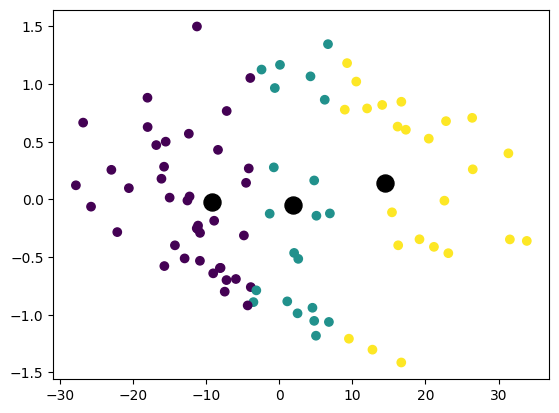

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(X)
pca_data = pca.transform(X)
    
meanshift = MeanShift().fit(pca_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=meanshift.predict(pca_data))
plt.scatter(meanshift.cluster_centers_[:, 0], meanshift.cluster_centers_[:, 1], c='black', s=150)
plt.show()